In [1]:
import pathlib
import xlsxwriter
import datetime
import time
from collections import OrderedDict
from skimage.filters import threshold_mean
from skimage.filters import threshold_otsu
from skimage.measure import regionprops, label
from skimage.morphology import closing, opening, disk
from skimage.segmentation import clear_border
from skimage.color import label2rgb
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import patches

In [2]:
%matplotlib notebook

In [3]:
# %matplotlib inline

In [3]:
colors_li = [plt.cm.get_cmap('hsv', 30)(i) for i in range(30)]

<IPython.core.display.Javascript object>


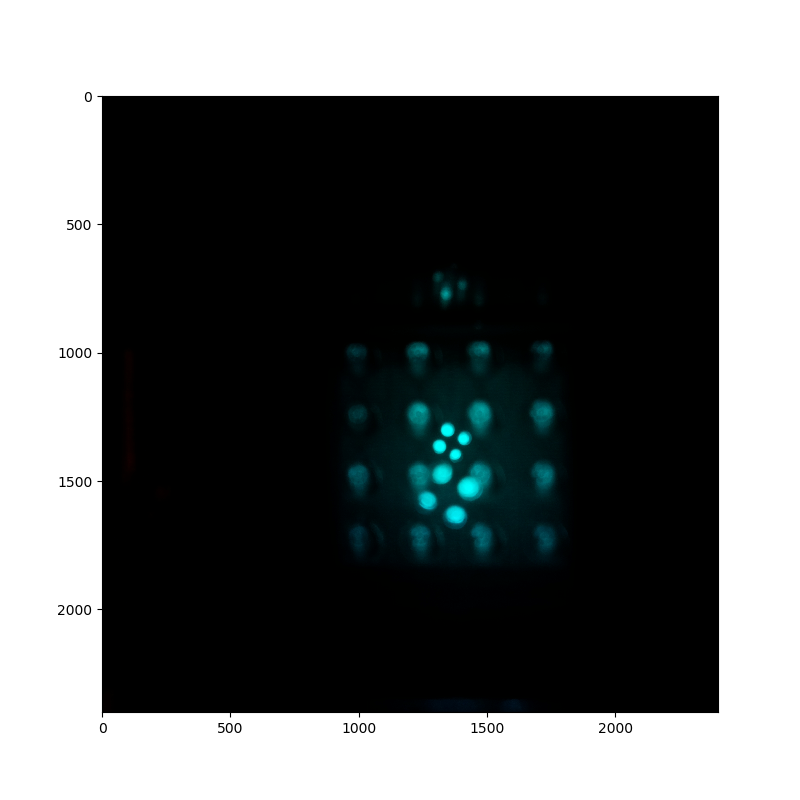

In [4]:
im_path = "F:\device\optics\grid_images\수동2_f_7.jpg"
im = np.array(Image.open(im_path))
plt.figure(figsize=(8,8))
plt.imshow(im)

In [5]:
im_gray = im.sum(axis=2)
cleared = clear_border(im_gray)
# thresh = threshold_otsu(cleared)
thresh = threshold_mean(cleared)
threshed_im = im_gray > thresh

<IPython.core.display.Javascript object>


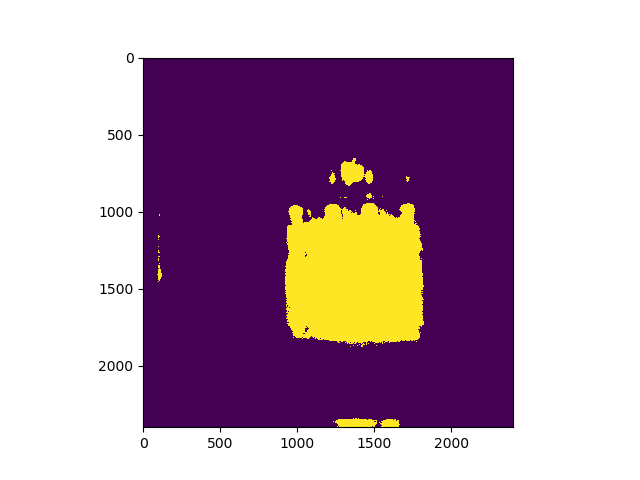

In [6]:
plt.imshow(threshed_im)

<IPython.core.display.Javascript object>


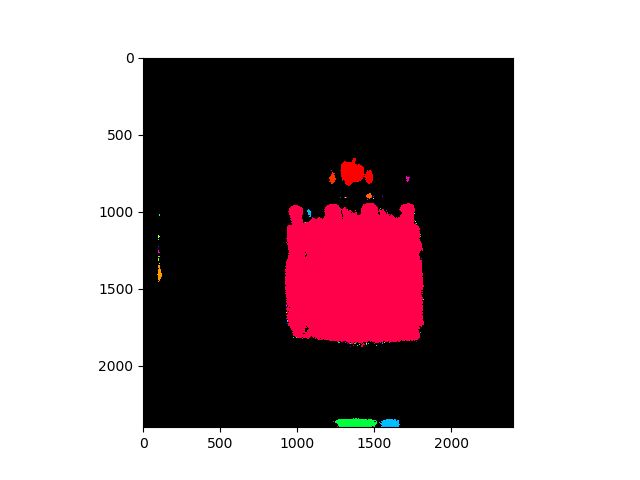

In [7]:
im_labeled = label(threshed_im)
image_label_overlay = label2rgb(im_labeled, bg_label=0, colors=colors_li)
plt.imshow(image_label_overlay)

In [8]:
region_dic = {}
for region in regionprops(im_labeled, intensity_image=im_gray):
    region_dic[region.area] = region
areas_li = sorted(list(region_dic.keys()), reverse=True)

In [9]:
region_well = region_dic[areas_li[0]]
minr, minc, maxr, maxc = region_well.bbox

<IPython.core.display.Javascript object>


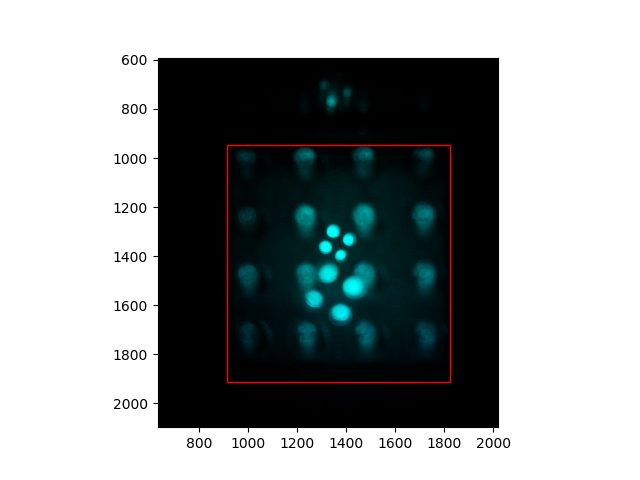

In [12]:
fig, ax = plt.subplots()
ax.imshow(im)
rect = patches.Rectangle((minc, minr), maxc-minc, maxr-minc, edgecolor='red', facecolor='none')
ax.add_patch(rect)


<IPython.core.display.Javascript object>


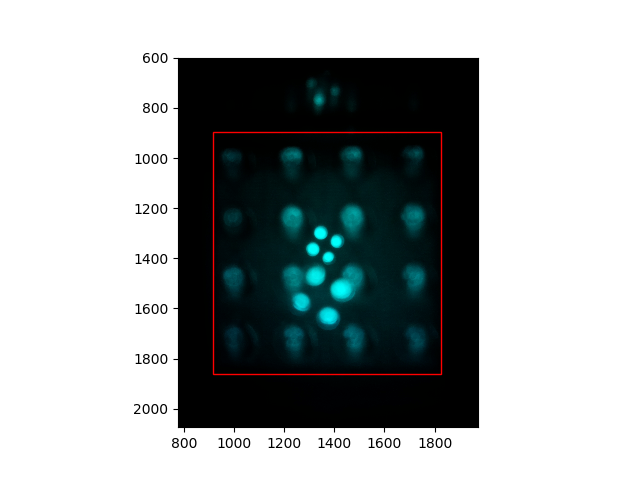

In [13]:
fig, ax = plt.subplots()
ax.imshow(im)
rect = patches.Rectangle((minc, minr-50), maxc-minc, maxr-minc, edgecolor='red', facecolor='none')
ax.add_patch(rect)


In [15]:
row_name = list('ABCD')
col_name = range(1, 5)

In [21]:
x_li = np.linspace(minc, maxc, 5, endpoint=True)
y_li = np.linspace(minr-50, maxr-50, 5, endpoint=True)
pts_li = [(x, y) for x in x_li for y in y_li]
grid = {}
for ind in range(19):
    i, j = divmod(ind, 5)
    if j == 4:
        continue
    top_left_pt = pts_li[ind]
    bottom_right_pt = pts_li[ind+6]
    well = row_name[j] + str(col_name[i])
    grid[well] = [top_left_pt[1], top_left_pt[0],
                  bottom_right_pt[1], bottom_right_pt[0]]

<IPython.core.display.Javascript object>


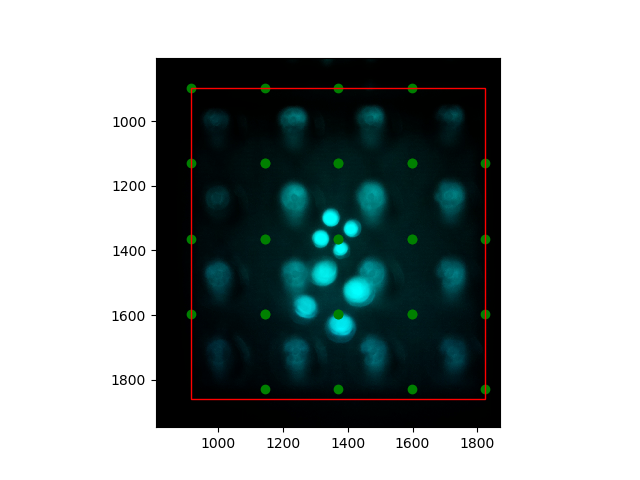

In [22]:
fig, ax = plt.subplots()
ax.imshow(im)
rect = patches.Rectangle((minc, minr-50), maxc-minc, maxr-minc, edgecolor='red', facecolor='none')
ax.add_patch(rect)
for pts in grid.values():
    ax.scatter(pts[1], pts[0], c='g')
    ax.scatter(pts[3], pts[2], c='g')

In [42]:
im_path = "F:\device\optics\grid_images\수동2_f_7_tube.jpg"
im = np.array(Image.open(im_path))
im_gray = im.sum(axis=2)
cleared = clear_border(im_gray)
thresh = threshold_mean(cleared)
threshed_im = im_gray > thresh
im_labeled = label(threshed_im)
region_dic = {}
for region in regionprops(im_labeled, intensity_image=im_gray):
    region_dic[region.area] = region
areas_li = sorted(list(region_dic.keys()), reverse=True)
region_well = region_dic[areas_li[0]]
minr, minc, maxr, maxc = region_well.bbox
x_li = np.linspace(minc-50, maxc+50, 5, endpoint=True)
y_li = np.linspace(minr-50, maxr, 5, endpoint=True)
pts_li = [(x, y) for x in x_li for y in y_li]
grid = {}
for ind in range(19):
    i, j = divmod(ind, 5)
    if j == 4:
        continue
    top_left_pt = pts_li[ind]
    bottom_right_pt = pts_li[ind+6]
    well = row_name[j] + str(col_name[i])
    grid[well] = [top_left_pt[1], top_left_pt[0],
                  bottom_right_pt[1], bottom_right_pt[0]]

<IPython.core.display.Javascript object>


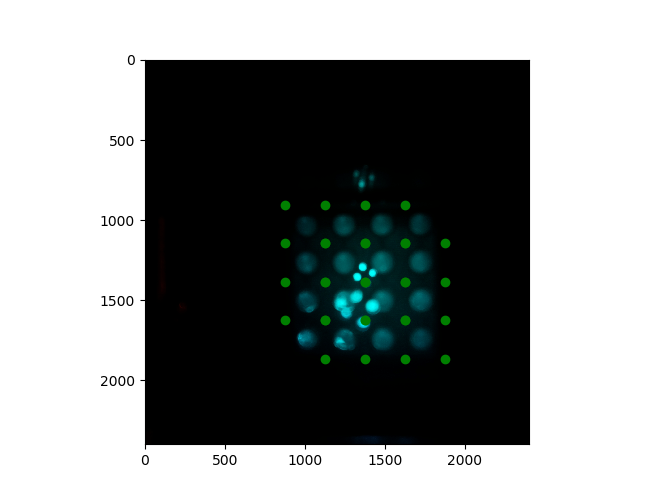

In [43]:
fig, ax = plt.subplots()
ax.imshow(im)
# rect = patches.Rectangle((minc-50, minr-50), maxc-minc+50, maxr-minc, edgecolor='red', facecolor='none')
# ax.add_patch(rect)
for pts in grid.values():
    ax.scatter(pts[1], pts[0], c='g')
    ax.scatter(pts[3], pts[2], c='g')